# Baseball Case Study
#### Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,validation_curve
from sklearn.metrics import accuracy_score,auc,confusion_matrix,plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,average_precision_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### Input features
1.  W - This indicates the number of Wins. Also target label.
2.  R - This indicates Runs scored.
3.  AB - This means At bat or time at bat. 
4.  H - This means Hit. It's also called a "base hit".
5.  2B - This is called "two base hit".
6.  3B - This measns a Triple.
7.  HR - This means Home runs. 
8.	BB - This means Base on balls (also called a "walk"). 
9.	SO - Also denoted as "K" means Strikeout. 
10.	SB - This means Stolen base. 
11.	RA - This means Run Average. 
12.	ER - This means Earned run
13.	ERA - This means Earned Run Average. 
14.	CG - This means Complete Game
15.	SHO - This means Shutout. 
16.	SV - This means Save
17.	E - This means Errors. 

In [3]:

df.shape

(30, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
df.drop_duplicates(inplace=True) # finding any duplicate entries

In [6]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [7]:
df.isnull().sum().sum()   # checking for null values

0

In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [10]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [11]:
df.skew().sort_values()

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

Now we will perform EDA

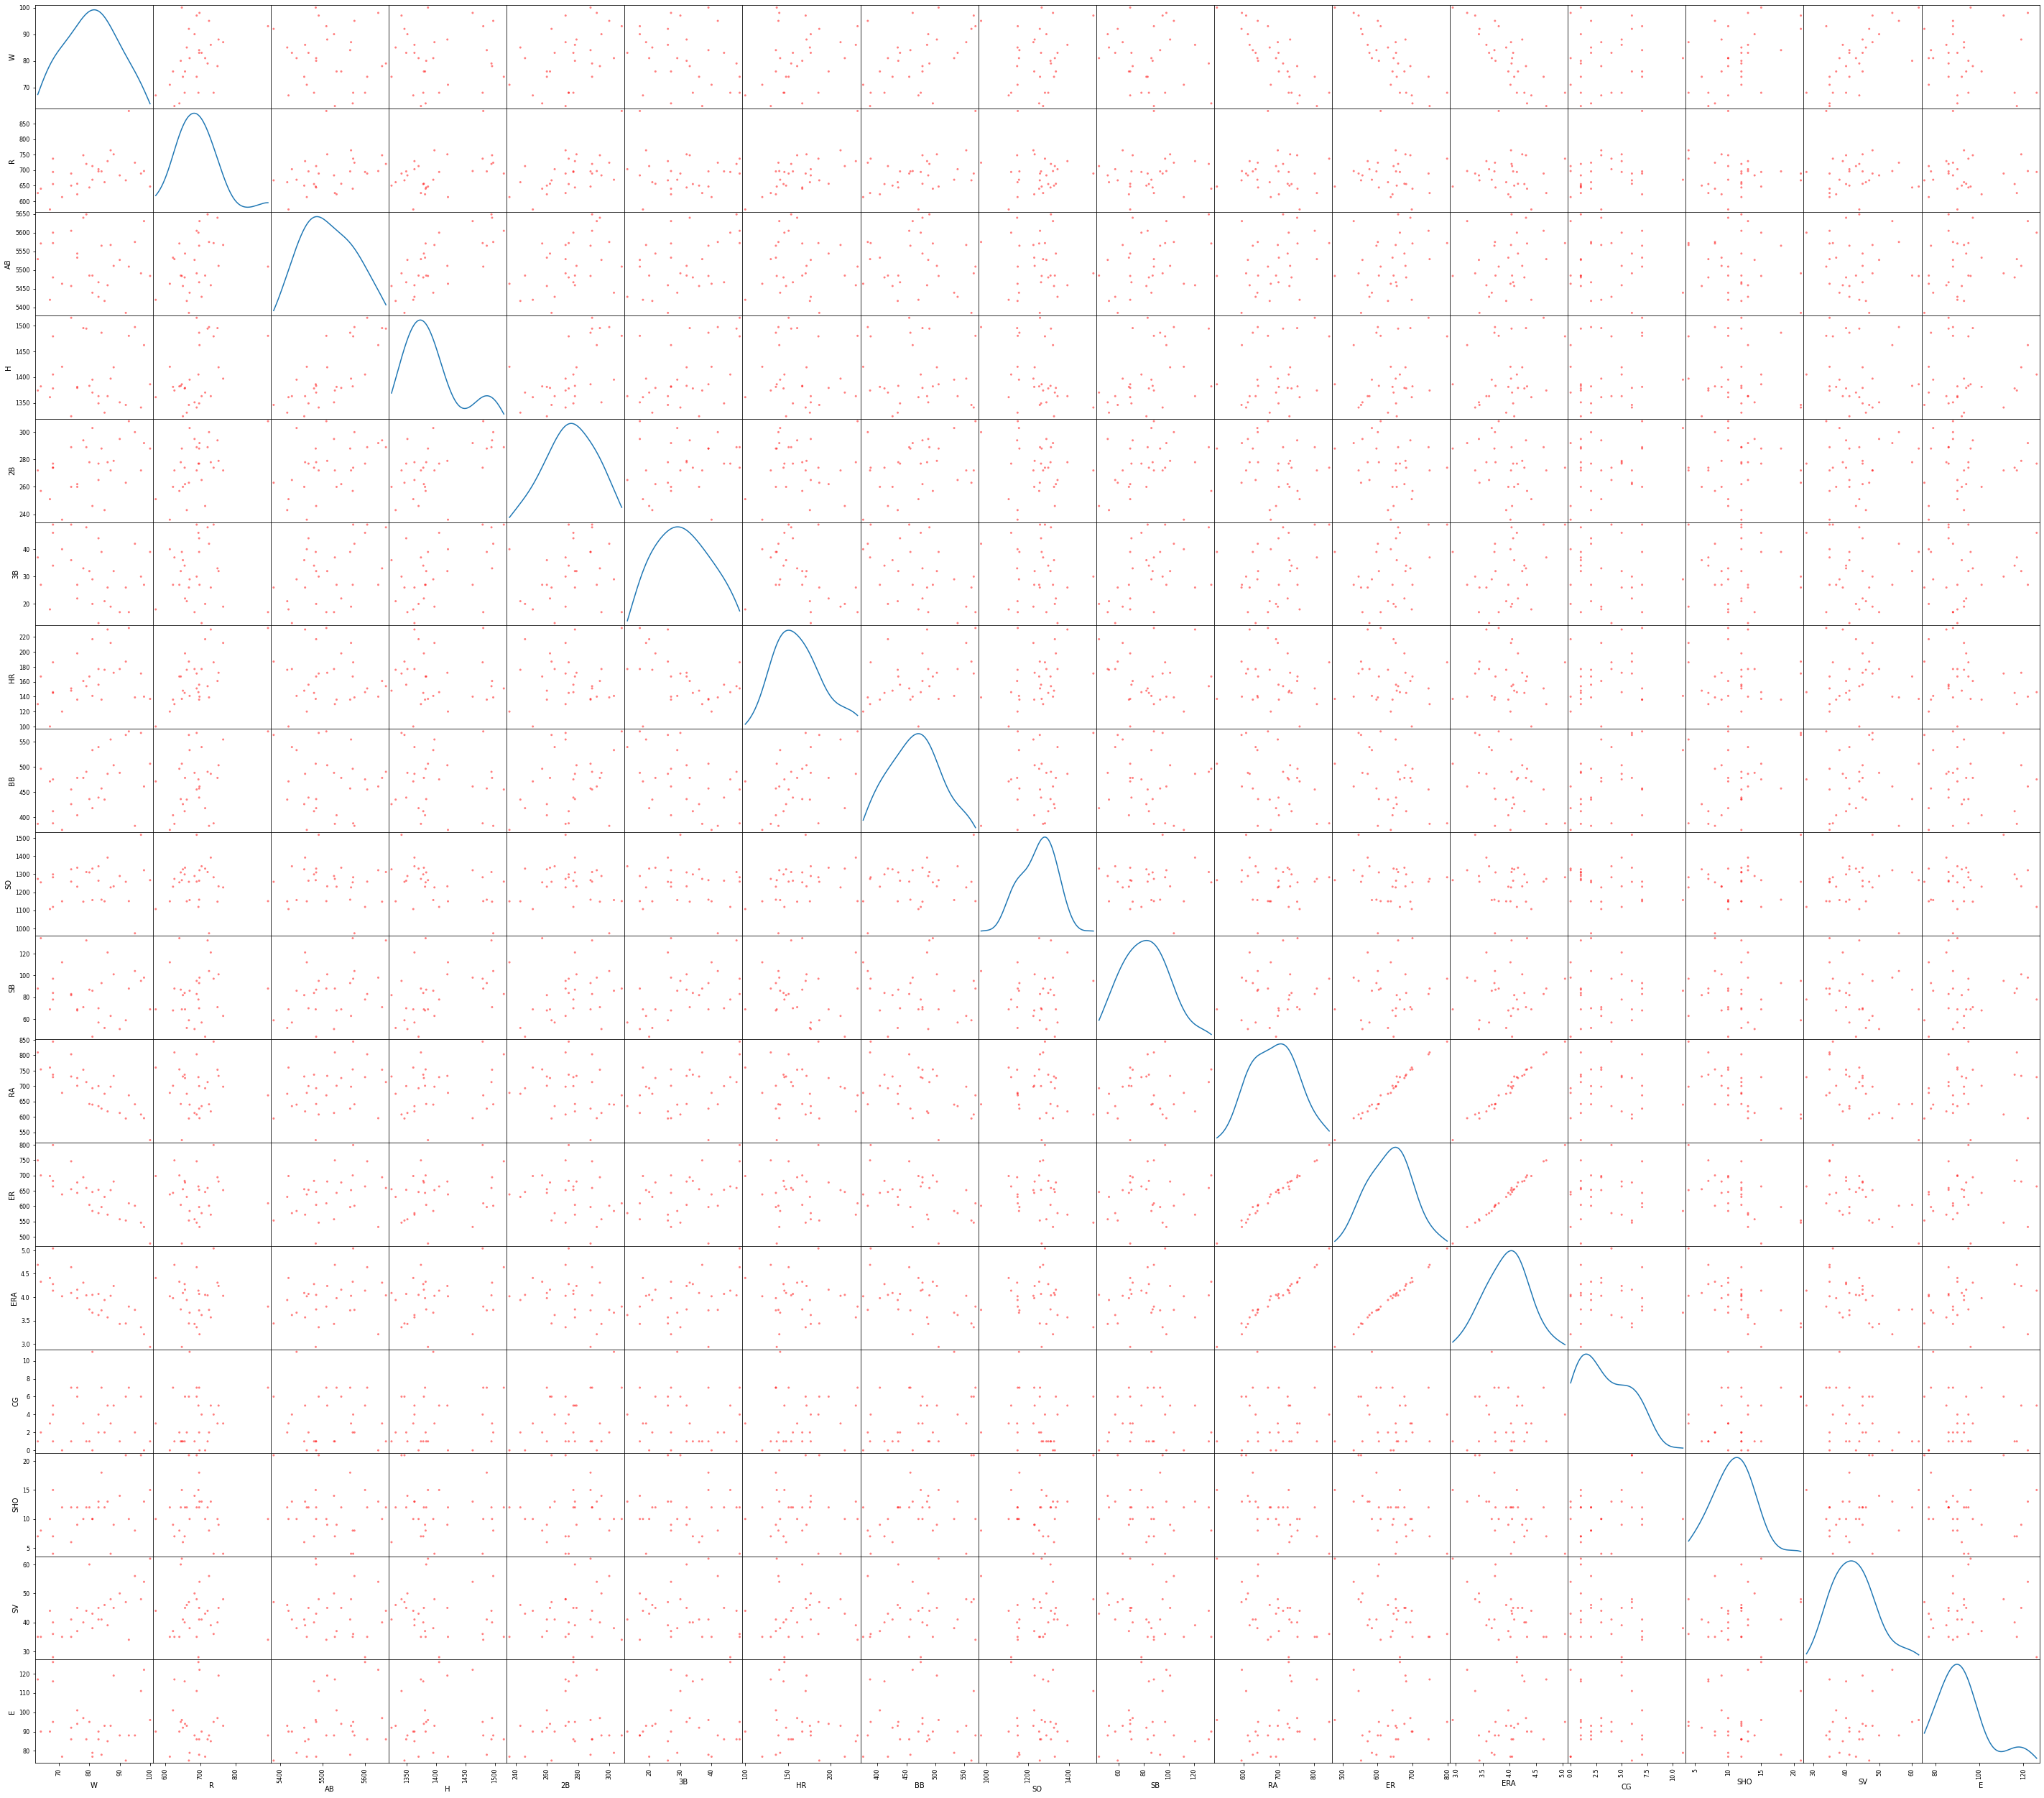

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(50,45),color='r',diagonal='kde')
plt.show()

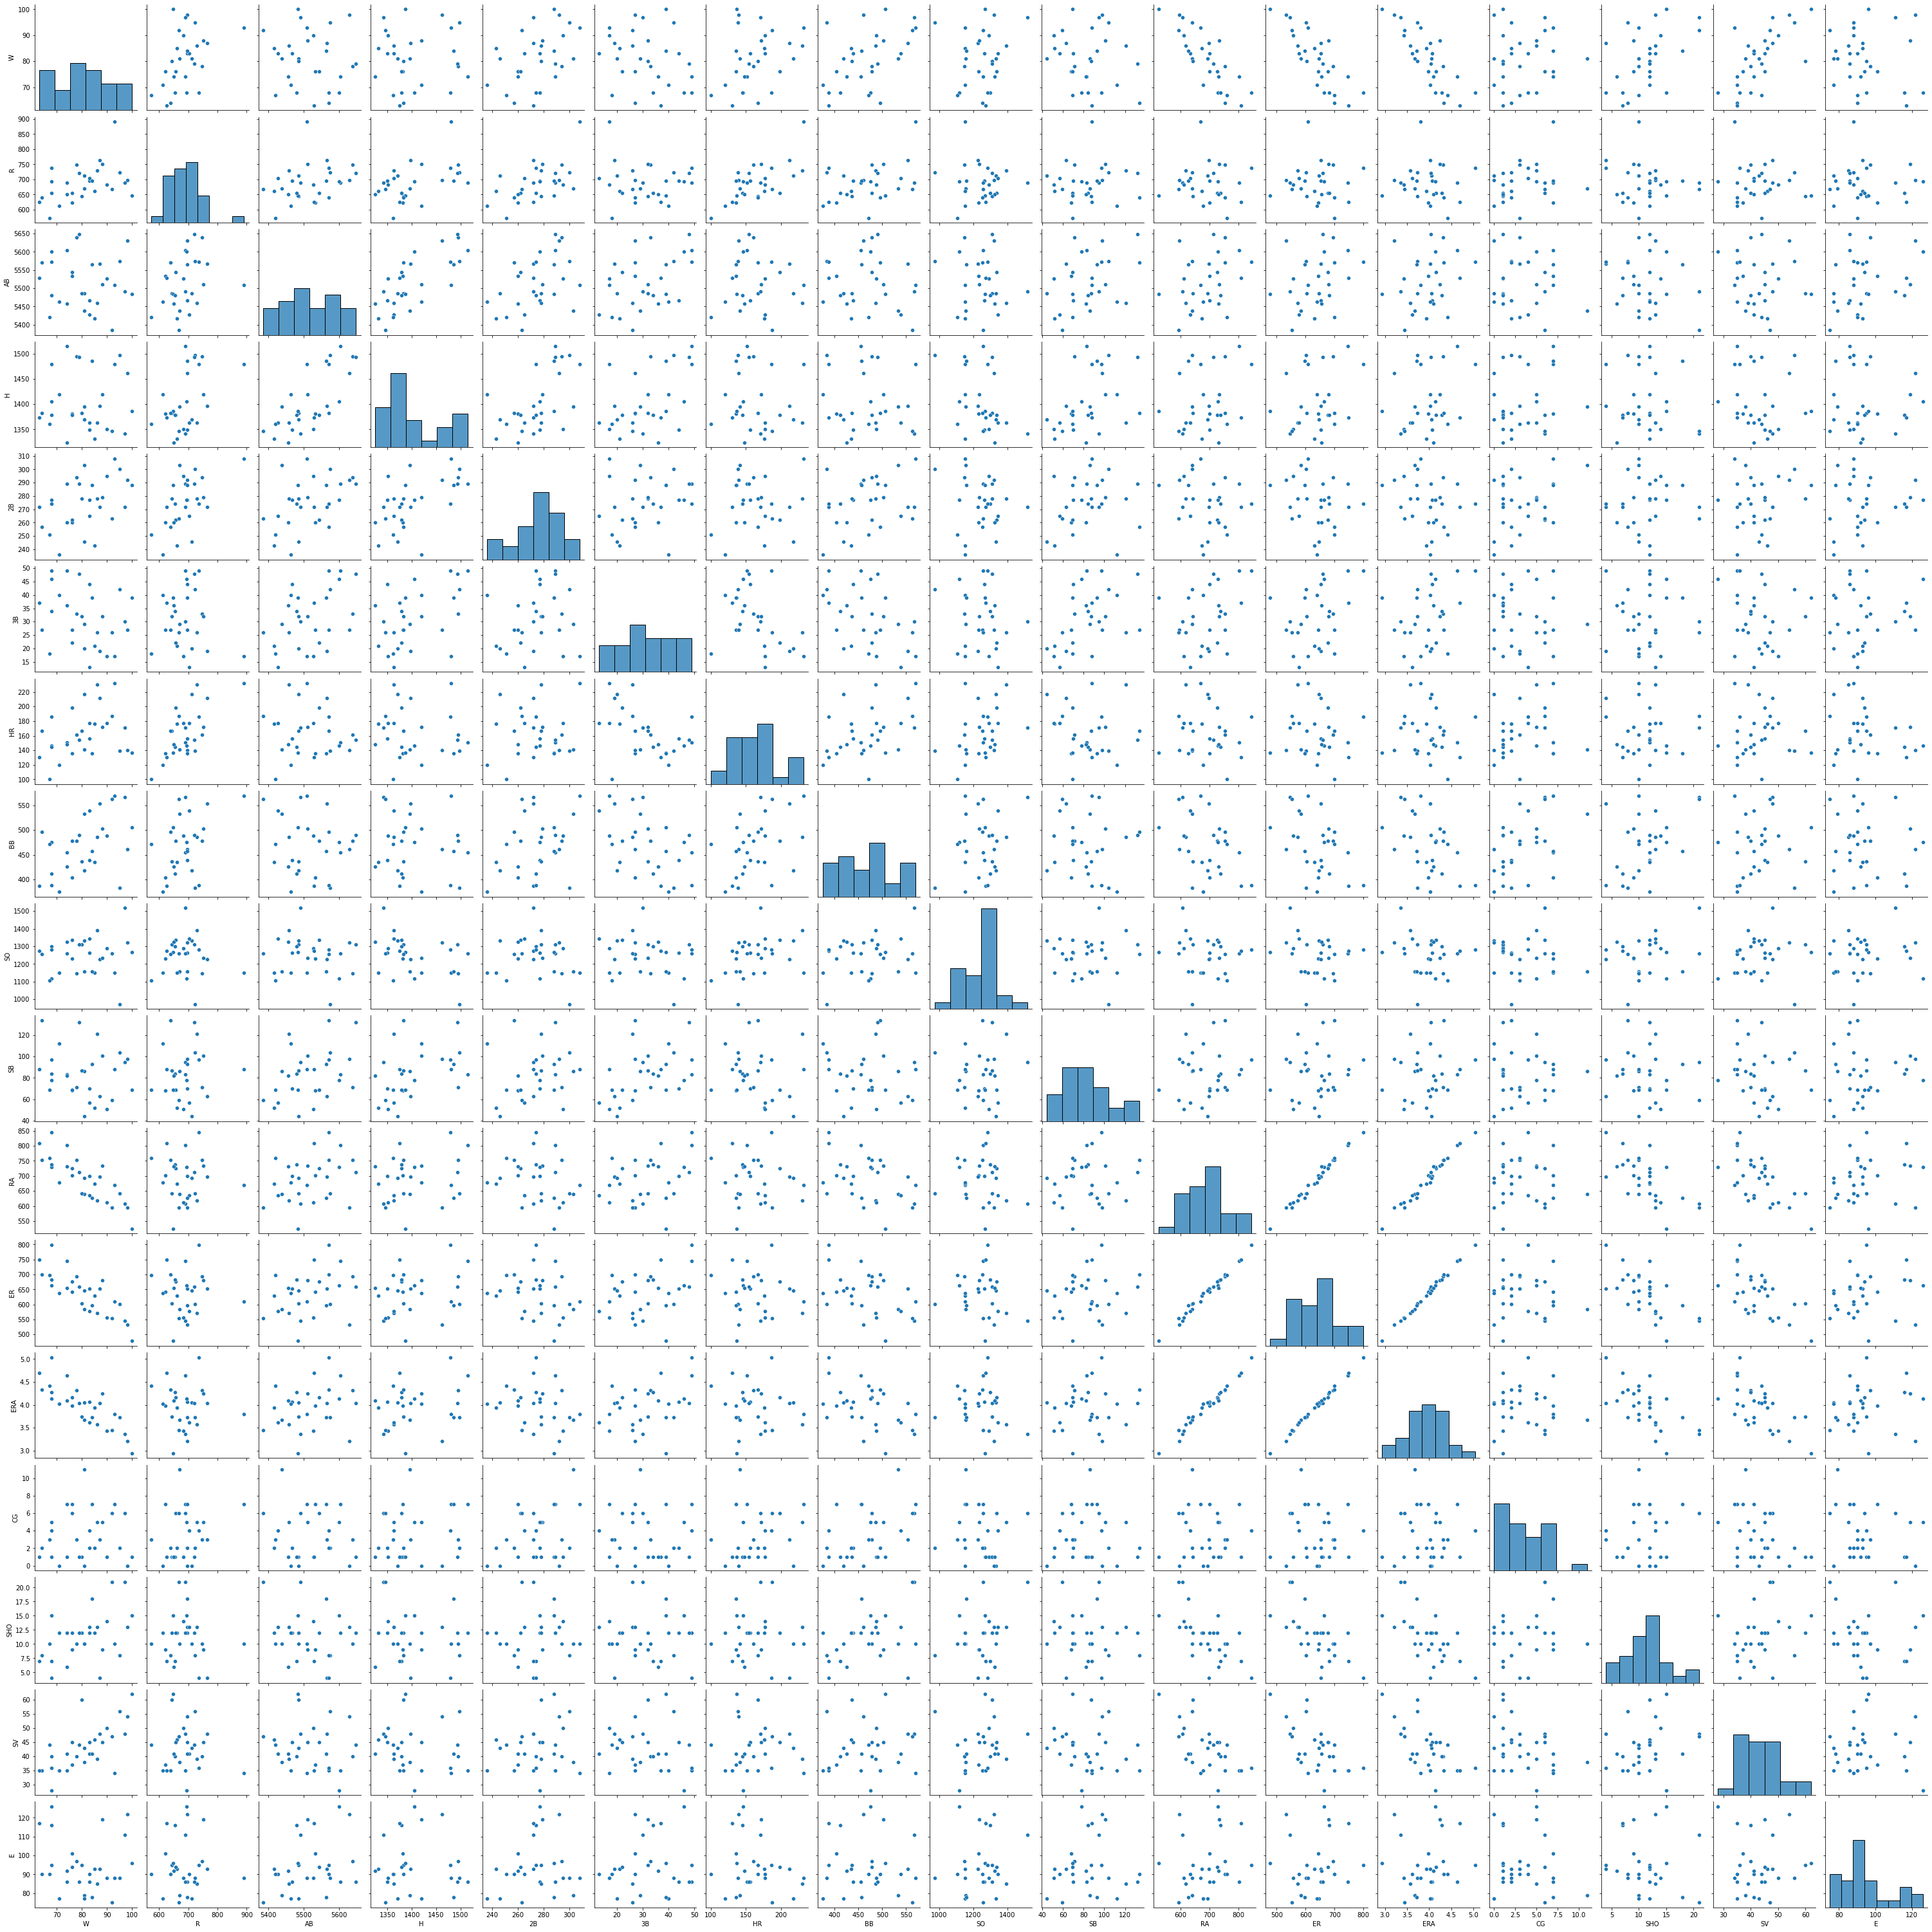

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
def visual(df,i):
    plt.figure(figsize=(25,10),facecolor='blue')
    plt.subplot(1,4,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,4,2)
    sns.regplot(x=i,y='W',data=df)
    plt.subplot(1,4,3)
    sns.boxplot(y=i,data=df)
    plt.subplot(1,4,4)
    sns.barplot(x=i,data=df)
    plt.show()

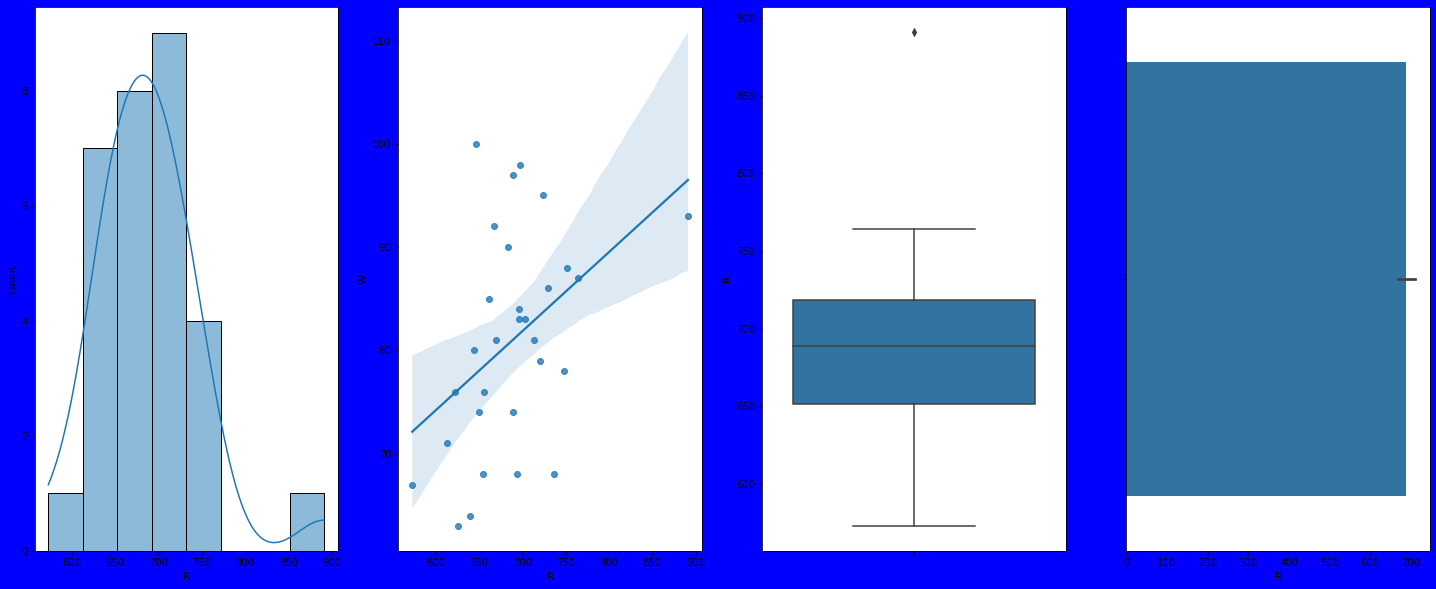

In [15]:
visual(df,'R')

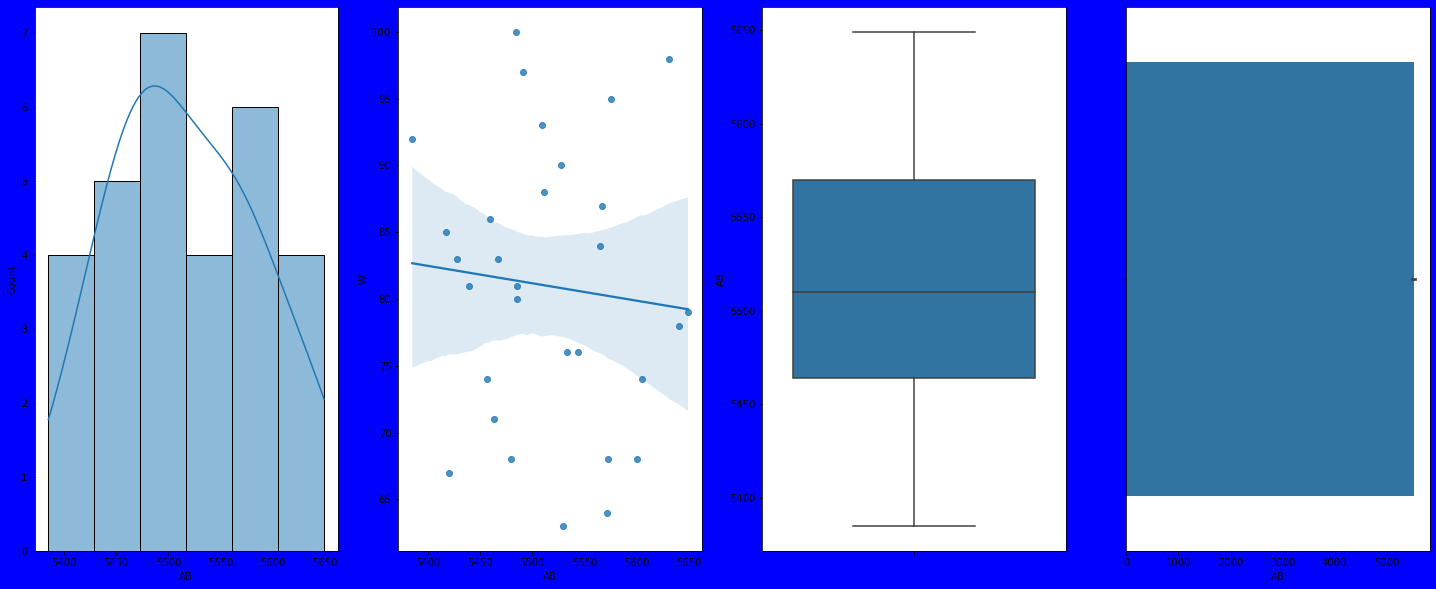

In [16]:
visual(df,'AB')

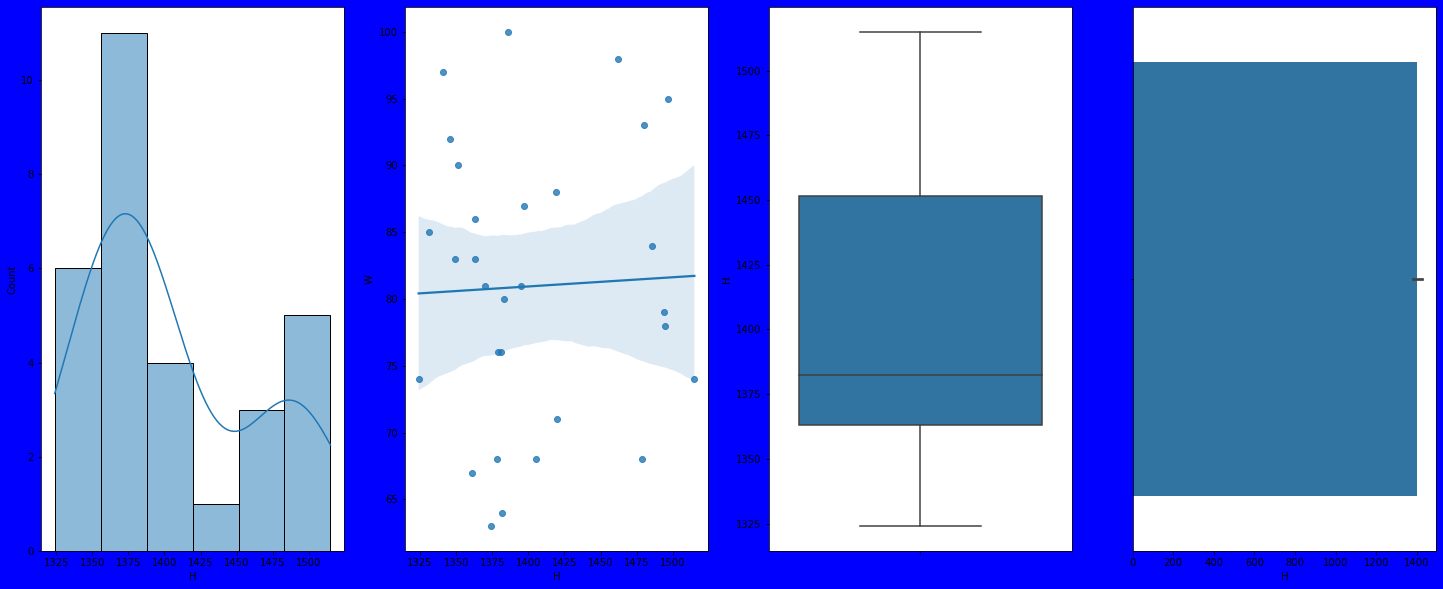

In [17]:
visual(df,'H')

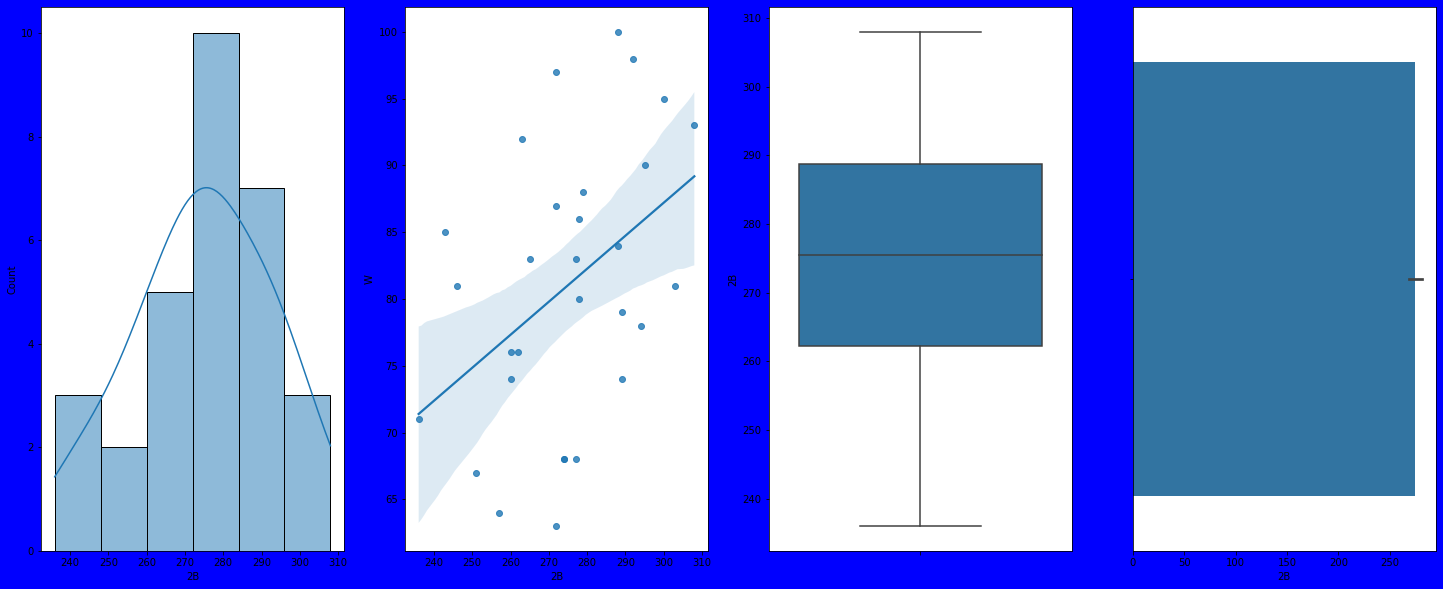

In [18]:
visual(df,'2B')

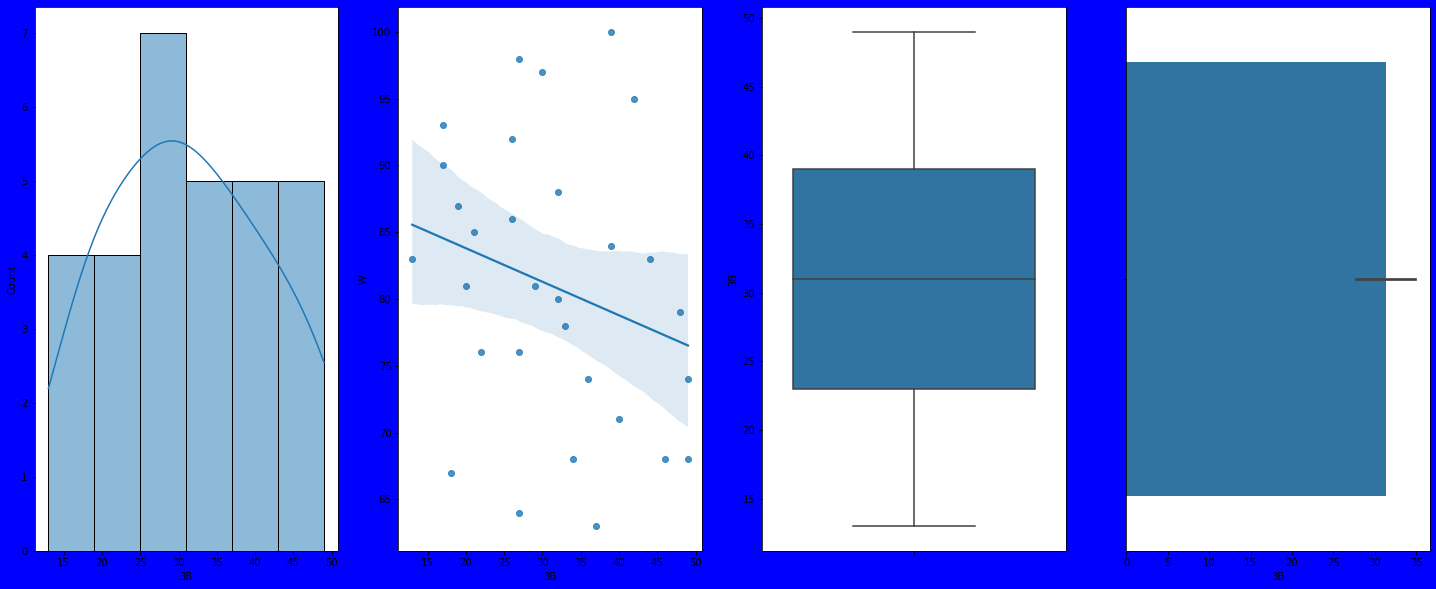

In [19]:
visual(df,'3B')

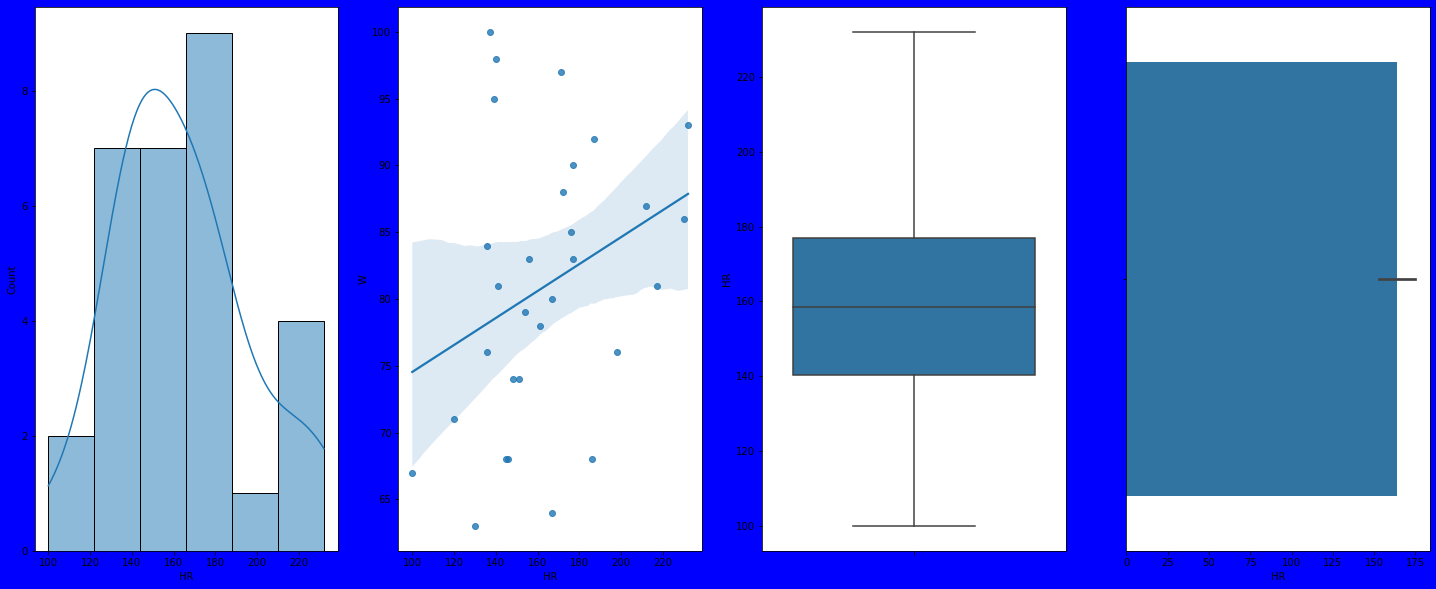

In [20]:
visual(df,'HR')

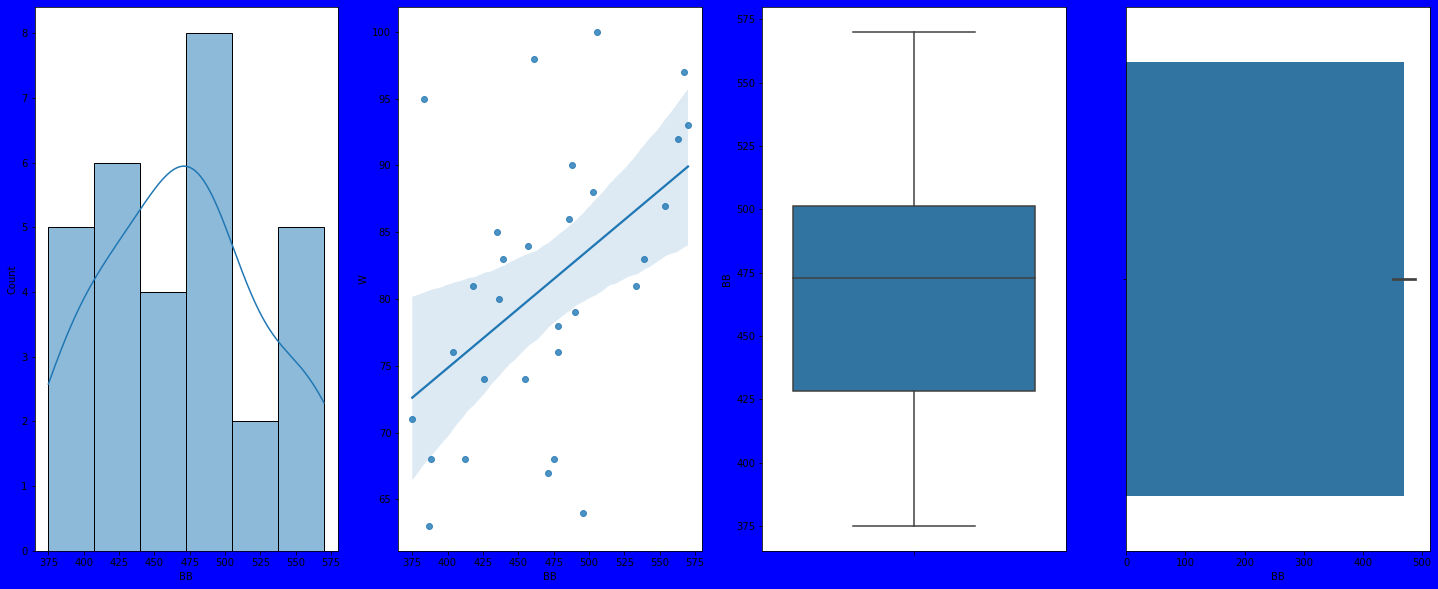

In [21]:
visual(df,'BB')

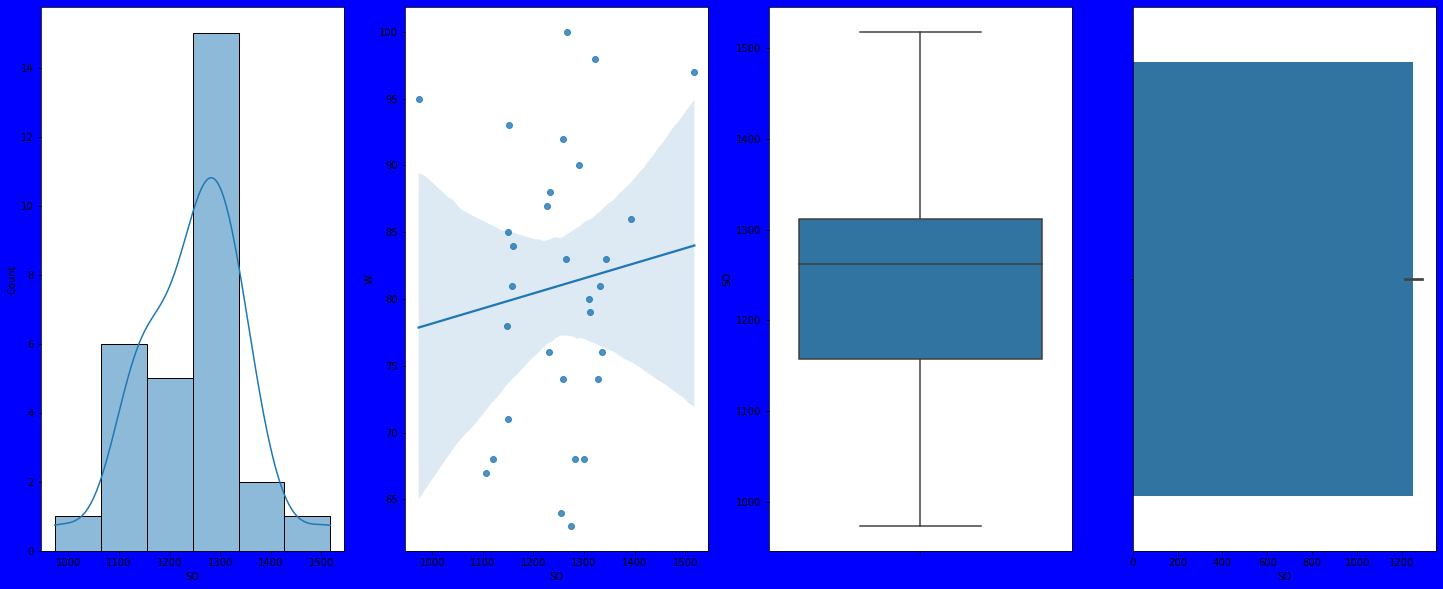

In [22]:
visual(df,'SO')

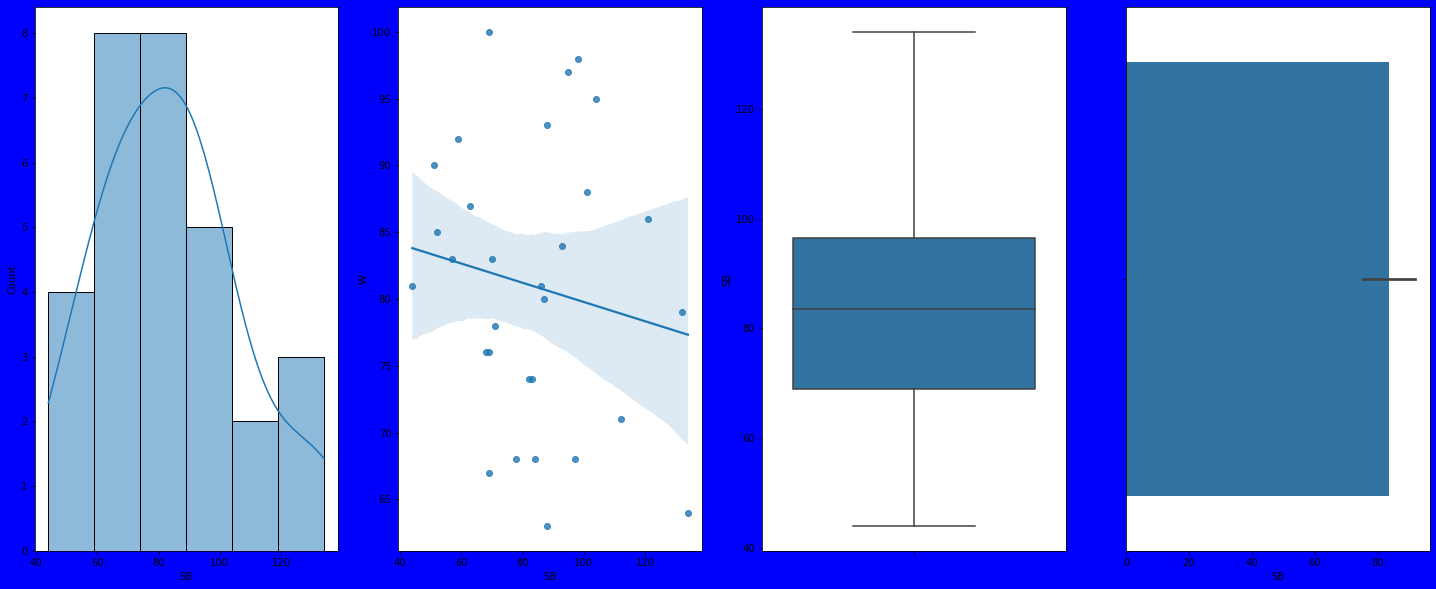

In [23]:
visual(df,'SB')

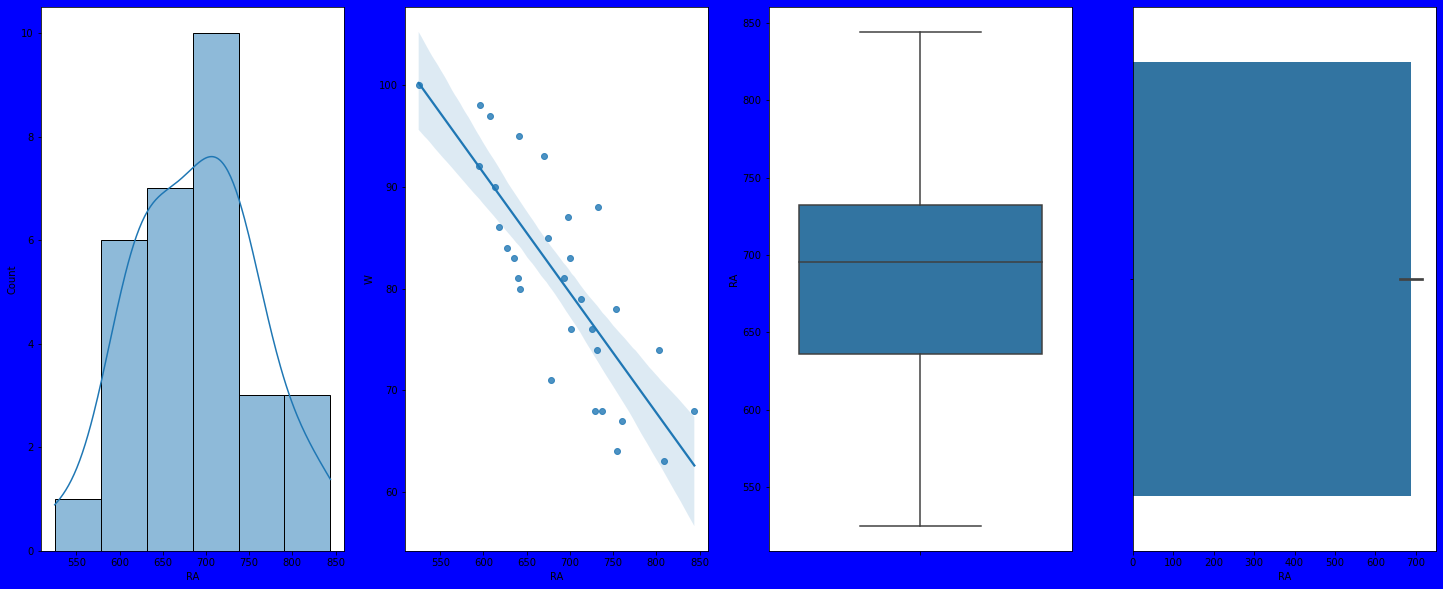

In [24]:
visual(df,'RA')

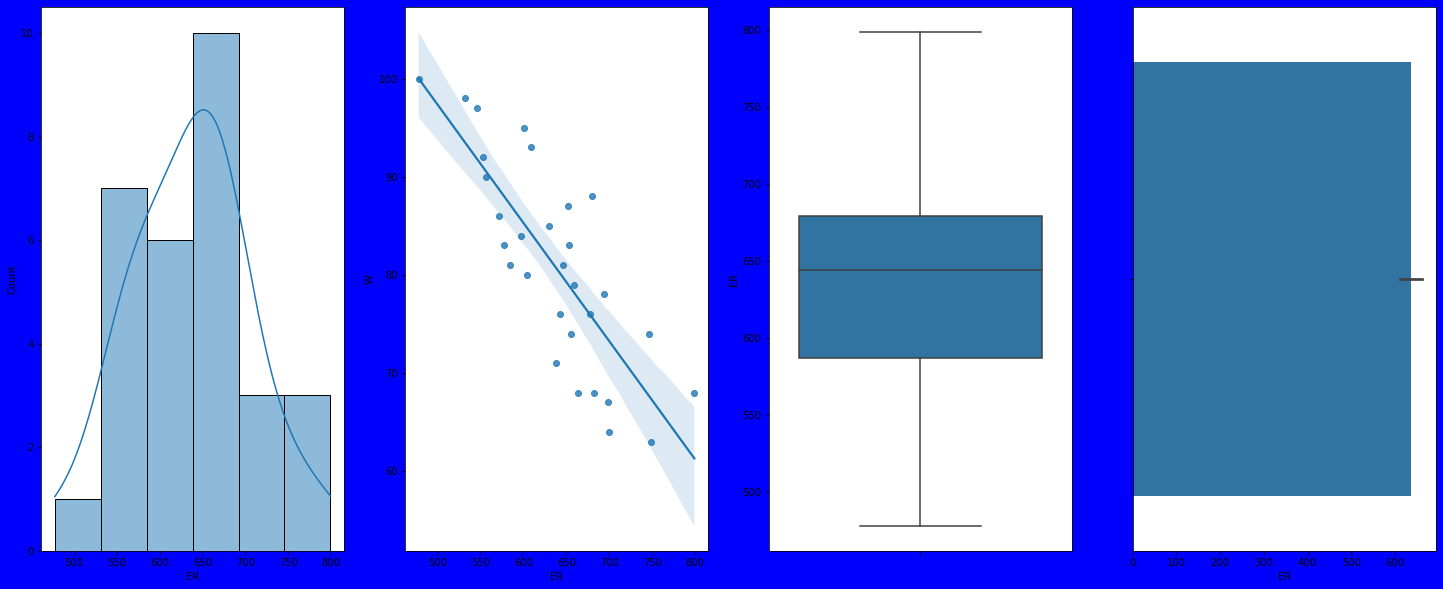

In [25]:
visual(df,'ER')

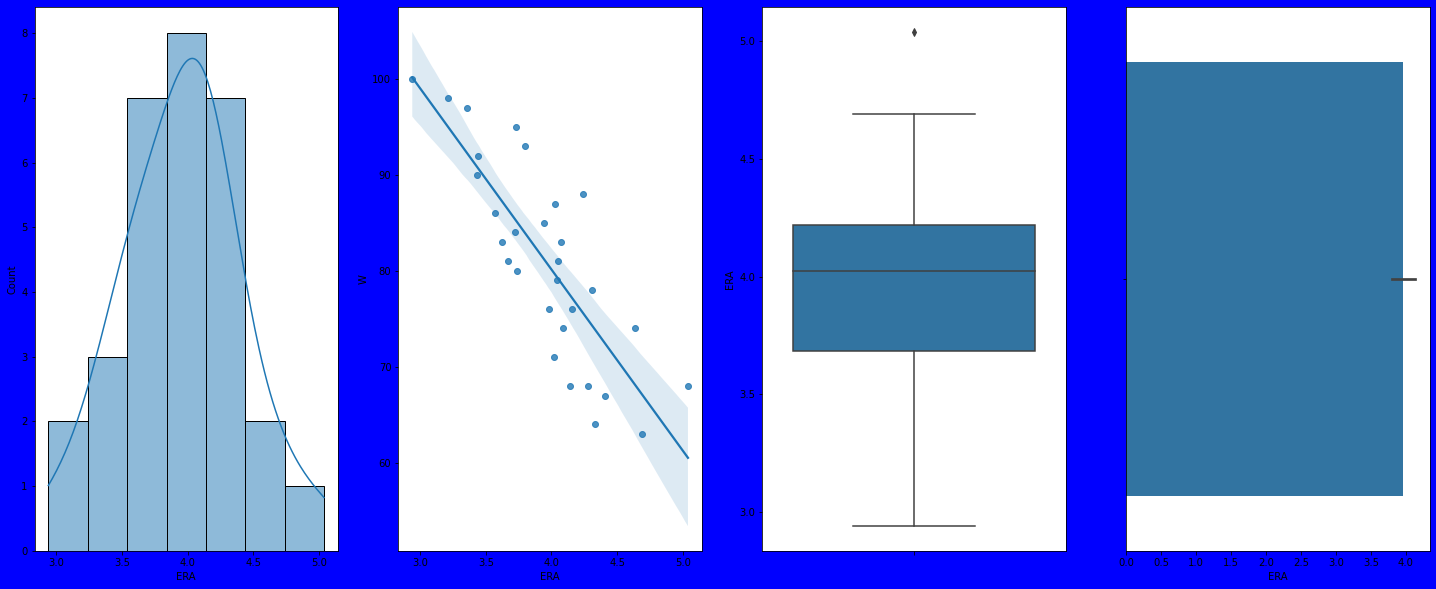

In [26]:
visual(df,'ERA')

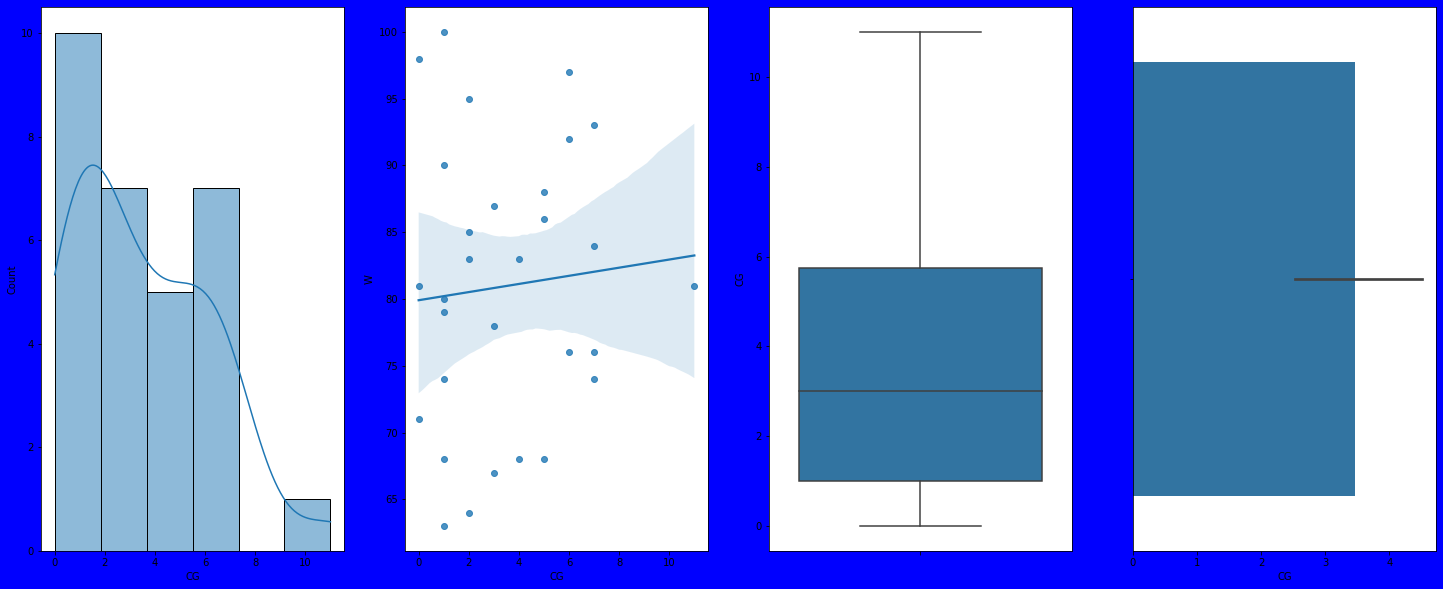

In [27]:
visual(df,'CG')

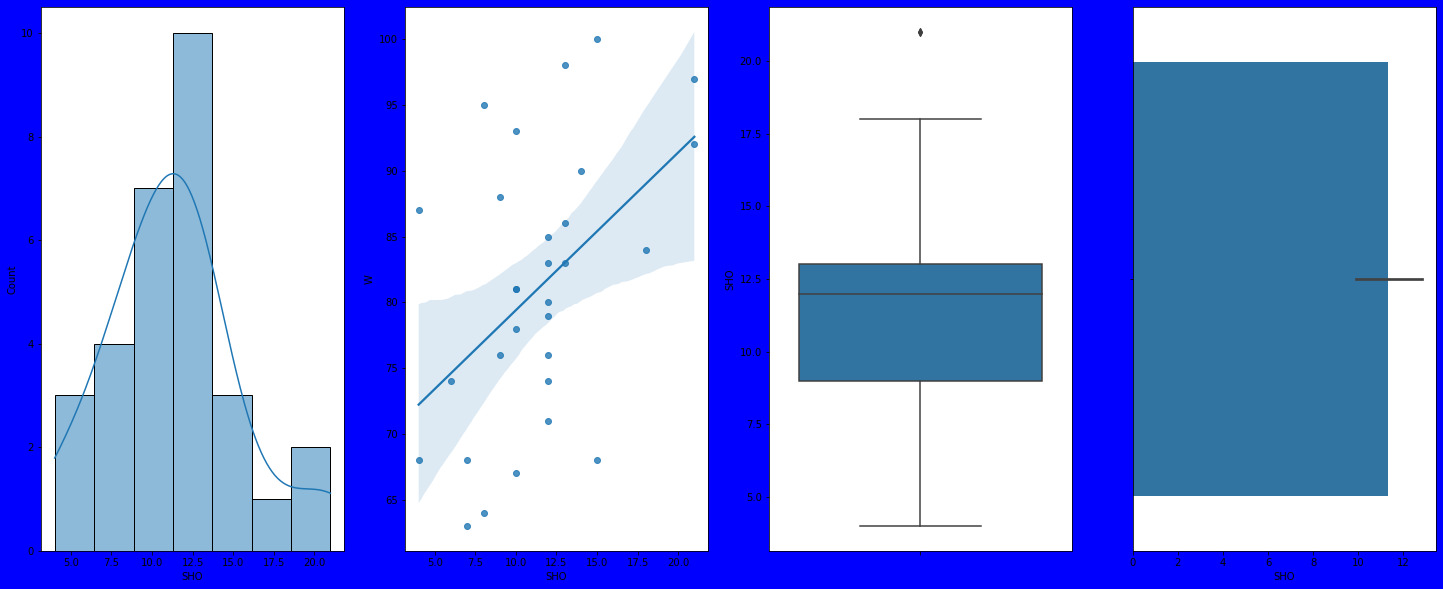

In [28]:
visual(df,'SHO')

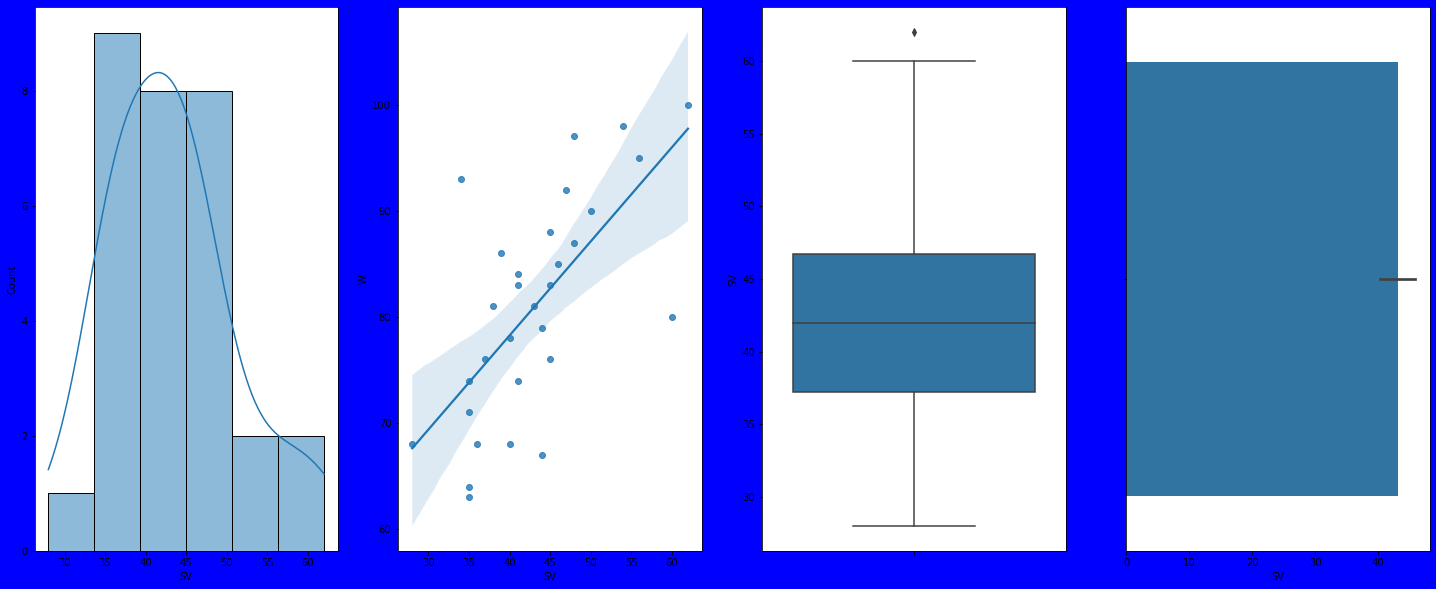

In [29]:
visual(df,'SV')

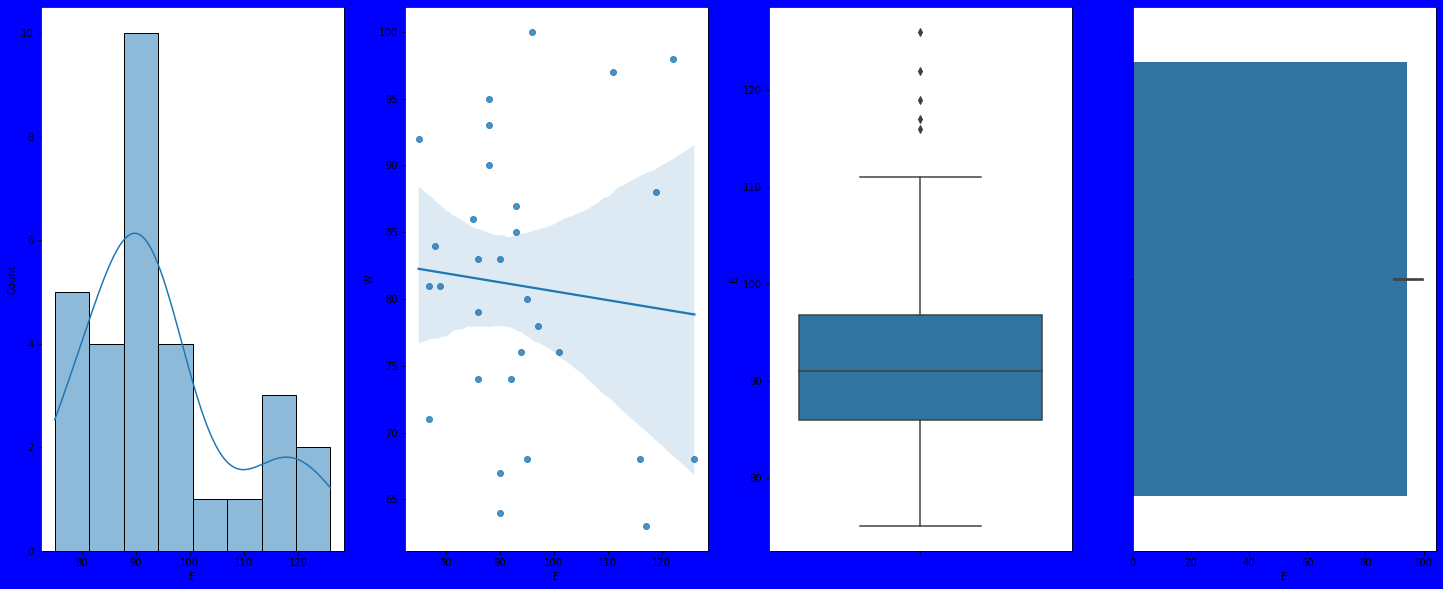

In [30]:
visual(df,'E')

Now we will remove outliers from data

In [31]:
from scipy.stats import iqr
from scipy import stats
IQR = stats.iqr(df,interpolation = 'midpoint')
  
print(IQR)

645.0


In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.03333333333333333


In [33]:
# now we willseprate features and labels
features=df1.drop('W',axis=1)
labels=df1.W


In [34]:
scalar=PowerTransformer()
scaled_f=scalar.fit_transform(features)

In [35]:
scaled_f.shape

(29, 16)

In [36]:
features.shape

(29, 16)

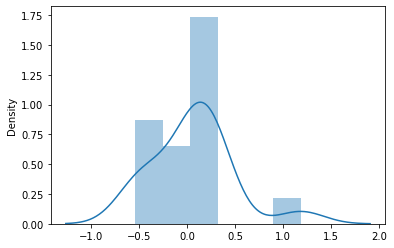

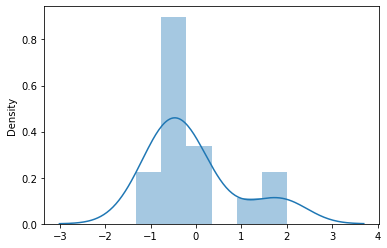

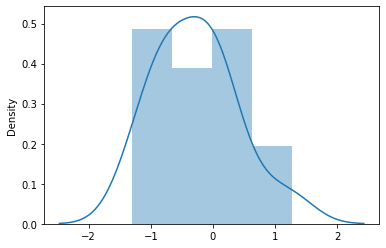

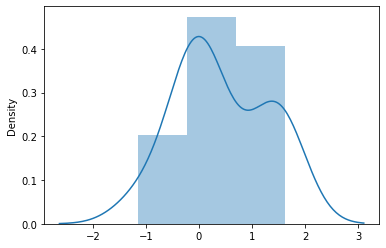

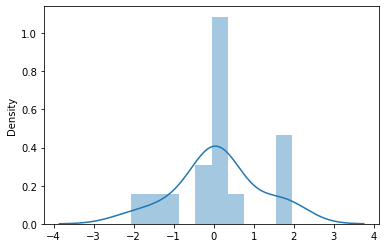

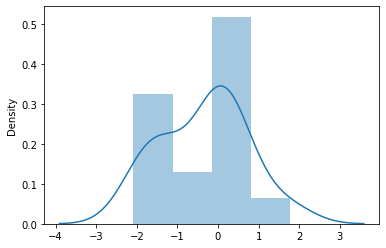

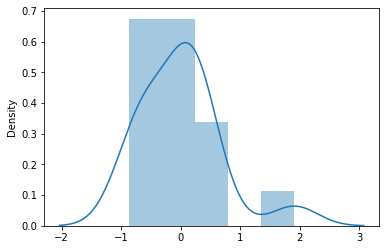

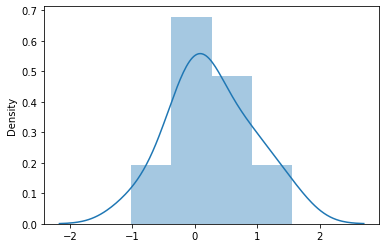

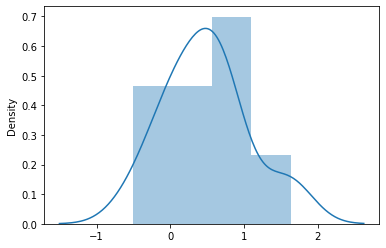

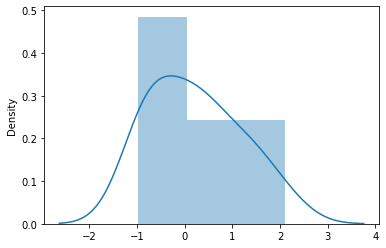

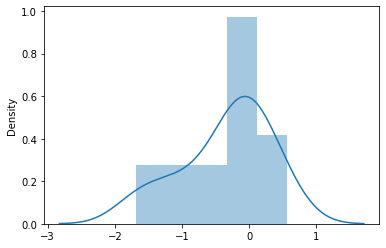

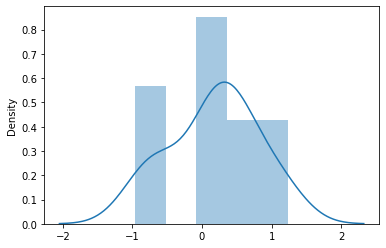

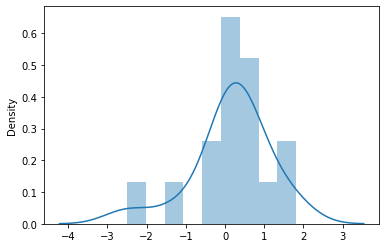

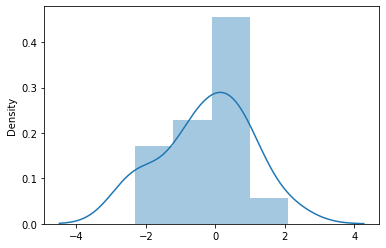

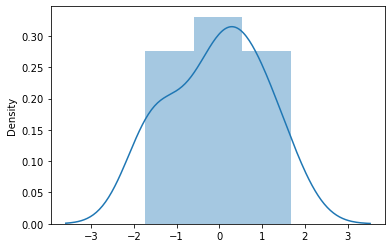

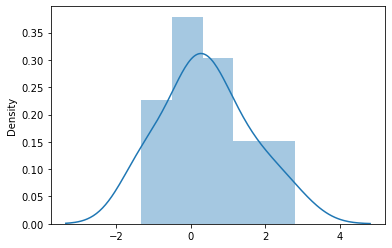

In [37]:
# visualize data after poer transform
x1=scaled_f
for i in range(1,17):
    sns.distplot(x1[i])
    plt.show()

<AxesSubplot:>

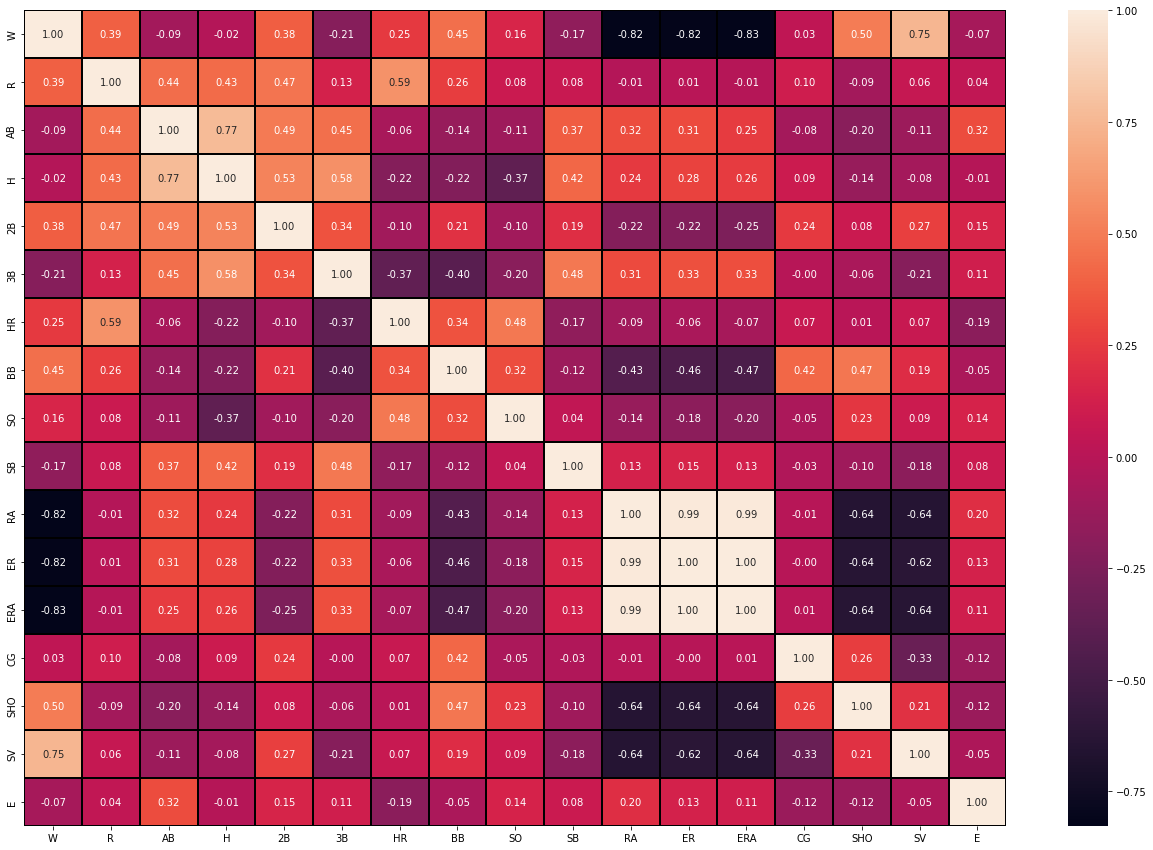

In [38]:
# plotting heat map
plt.figure(figsize=(22,15)) # ploting the heat map
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [39]:
# now we will get the highly correlated columns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = correlation(df1, 0.5)
len(set(corr_features))

9

In [41]:
corr_features

{'2B', '3B', 'ER', 'ERA', 'H', 'HR', 'RA', 'SHO', 'SV'}

In [42]:
# checking the correlation with target column W
df1.corr()['W'].sort_values()

ERA   -0.826952
RA    -0.823176
ER    -0.815308
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.072858
H     -0.018360
CG     0.029594
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.749290
W      1.000000
Name: W, dtype: float64

<AxesSubplot:title={'center':'Correlation with target'}>

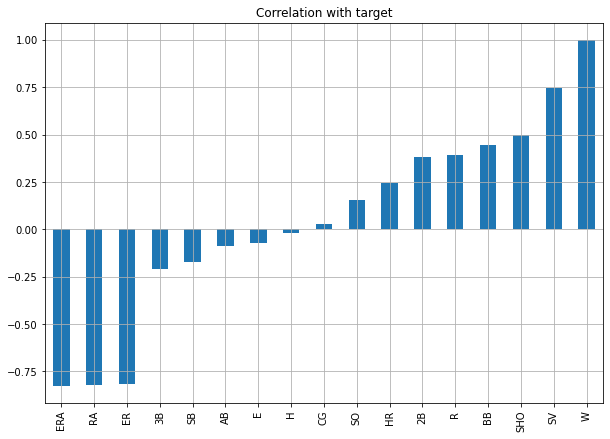

In [43]:
df1.corr()['W'].sort_values().plot(kind='bar',grid=True,figsize=(10,7),title='Correlation with target') # graphical representation


In [44]:
# dropping less correalted columns
X=df1.drop(columns=['ERA','RA','ER','3B','SB','AB','E','H','W','CG'],axis=1)
y=df1['W']

In [45]:
# now we will scale it again by using Standard Scaler
scaler=StandardScaler()
Scaled=scaler.fit_transform(X)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# after droping correlated features check VIF again
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (Scaled, i) for i in range (Scaled.shape[1])]
vif["Features"] = X.columns
#vif must be done after scaling the data 
#Let's check the values
vif

,vif,Features
0,3.142393,R
1,2.151210,2B
2,3.216904,HR
3,1.623549,BB
4,1.538371,SO
5,1.442413,SHO
6,1.171387,SV


In [51]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [52]:
# we will do over sampling of data
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [53]:
# define dataset
X, y = make_classification(n_samples=213, weights=[0.193], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({1: 171, 0: 42})
Counter({0: 171, 1: 171})


### Applying ML

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30,stratify=y)

In [55]:
# For Logestic regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
pred_train_lr=lr.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_lr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Test Accuracy 98.14814814814815
Training Accuracy 96.85534591194968
[[10  1]
 [ 0 43]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.98      1.00      0.99        43

    accuracy                           0.98        54
   macro avg       0.99      0.95      0.97        54
weighted avg       0.98      0.98      0.98        54



In [56]:
# For KNN
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
pred_train_KNN=KNN.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predKNN)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_KNN)*100)
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

Test Accuracy 88.88888888888889
Training Accuracy 88.67924528301887
[[ 5  6]
 [ 0 43]]
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        11
           1       0.88      1.00      0.93        43

    accuracy                           0.89        54
   macro avg       0.94      0.73      0.78        54
weighted avg       0.90      0.89      0.87        54



In [57]:
# For Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
pred_train_dt=dt.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,preddt)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_dt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy 90.74074074074075
Training Accuracy 100.0
[[ 8  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.93      0.95      0.94        43

    accuracy                           0.91        54
   macro avg       0.87      0.84      0.85        54
weighted avg       0.90      0.91      0.91        54



In [58]:
rdf =RandomForestClassifier()
rdf.fit(X_train,y_train)
predrdf=rdf.predict(X_test)
pred_train_rdf=rdf.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predrdf)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_rdf)*100)
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

Test Accuracy 92.5925925925926
Training Accuracy 100.0
[[ 9  2]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.95      0.95      0.95        43

    accuracy                           0.93        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.93      0.93      0.93        54



In [59]:
svr=SVC()
svr.fit(X_train,y_train)
pred_svr=svr.predict(X_test)
pred_train_svr=svr.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,pred_svr)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_svr)*100)
print(confusion_matrix(y_test,pred_svr))
print(classification_report(y_test,pred_svr))

Test Accuracy 92.5925925925926
Training Accuracy 98.74213836477988
[[ 7  4]
 [ 0 43]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.91      1.00      0.96        43

    accuracy                           0.93        54
   macro avg       0.96      0.82      0.87        54
weighted avg       0.93      0.93      0.92        54



### checking cross validation score


In [60]:
cr_1=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of LR model :",cr_1.mean()*100)

Cross Validation Score of LR model : 95.79180509413068


In [61]:
cr_2=cross_val_score(KNN,X,y,cv=5)
print("Cross Validation Score of KNN model :",cr_2.mean()*100)

Cross Validation Score of KNN model : 86.42303433001108


In [62]:
cr_3=cross_val_score(dt,X,y,cv=5)
print("Cross Validation Score of DT model :",cr_3.mean()*100)

Cross Validation Score of DT model : 91.09634551495016


In [63]:
cr_4=cross_val_score(rdf,X,y,cv=5)
print("Cross Validation Score of RDF model :",cr_4.mean()*100)

Cross Validation Score of RDF model : 95.79180509413068


In [64]:
cr_5=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of SVC model :",cr_5.mean()*100)

Cross Validation Score of SVC model : 95.79180509413068


## Hyperparameter tunning 

In [65]:
RandomForestClassifier()
parameters={"max_features":['sqrt','log2'],
    'max_depth':[5,6,7,8],
    'criterion':['gini','entrophy'],
    'n_estimators':[100,200,300,400,500]}

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=4,
                scoring="accuracy")
GCV.fit(X_train,y_train)
#fitting the dataset in model:
GCV.best_params_
#printing the best parameters found by GridsearchCV
type(GCV)
#RandomForestClassifier()
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [66]:
#predicting the best accuracy parameters
#checking the first accuracy:
GCV_pred=GCV.predict(X_test)
accuracy_score(y_test,GCV_pred)*100

94.44444444444444

## roc_auc curve

In [ ]:
plot_roc_curve(GCV.best_estimator_,X_test,y_test)  
plt.title("ROC AUC plot")
plt.show() 